<H1> Quick EDSA Leaderboard get from Kaggle </H1>

<h3 style="color:Green">Pre  Script   Procedures - Getting   your   API   key </h3>

In [31]:
#If you haven't installed the Kaggle Package run this code:(Can uncomment code to run in Notebook)
'''!pip install Kaggle'''

#Once installed - get your Kaggle API key here https://www.kaggle.com/**YOUR USERNAME HERE*/account
#The JSON file needs to be saved in, assuming windows, C:/Users/**YOUR USER**/.kaggle
#Kaggle api checks the environment variable here.
#See Screenshot below

'!pip install Kaggle'

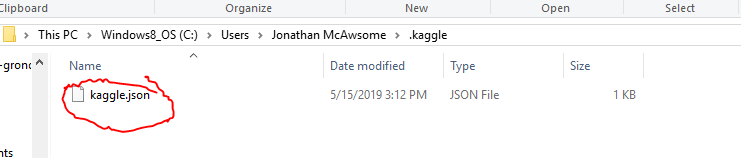

<h4 style="color:Red">NB to ensure API Key instructions have been followed first.  </h4>

<h3 style="color:Green">Packages needed</h3>

In [27]:
import kaggle as kg
import zipfile
import pandas as pd
import os

<h3 style="color:Green">Funtion Defining</h3>

In [33]:
def comp_edsa_leaderboard(competition_name):
    '''
    Function Creates Dataframe containing specified competitions leaderboard as at the time of execution.
    
    NB - set Function to object: Object_001 = comp_edsa_leaderboard(competition_name)
    
    Competition Name = Kaggle Denominated name 
    
    Best place to obtain is in URL
    E.g - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    **house-prices-advanced-regression-techniques**
    
    '''

    #Authentication with Kaggle API
    kg.api.authenticate()
    
    #Api request leaderboard file - Saves Zip File in local directory
    kg.api.competition_leaderboard_download(competition=competition_name,path=r'./')
    
    #Opens Zip File 
    zf = zipfile.ZipFile(r'./'+str(competition_name)+'.zip')
    
    #Grabs CSV from zip file and loads into Dataframe
    df_comp_leaderboard = pd.read_csv(zf.open(str(competition_name)+'-publicleaderboard.csv'))
    
    #Deletes zf object so as to allow delete of zip file in local direcotry, deletes zip file.
    del zf
    os.remove(str(competition_name)+'.zip')
    
    return df_comp_leaderboard

<h3 style="color:Green">Play Ground</h3>

In [37]:
#Calling the function
df_comp_leaderboard = comp_edsa_leaderboard('house-prices-advanced-regression-techniques')

In [39]:
#Filters the Dataframe to show only EDSA teams &&& only the team's lowest score.
df_comp_leaderboard[df_comp_leaderboard['TeamName'].str.contains('EDSA')].groupby('TeamId').min().sort_values('Score')

,TeamName,SubmissionDate,Score
TeamId,,,
3157554,EDSA_Team15_2019,2019-05-14 13:05:56,0.12847
3132731,EDSA team 21,2019-05-10 12:01:13,0.13774
3132346,EDSA_CPT_Regression_team_10,2019-05-13 15:25:35,0.22610
3155428,EDSA_Team02_CPT,2019-05-16 16:29:44,0.52735
